In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_january = pd.read_csv('Sales_January_2019.csv')
df_february = pd.read_csv('Sales_February_2019.csv')
df_march = pd.read_csv('Sales_March_2019.csv')
df_may = pd.read_csv('Sales_May_2019.csv')
df_april = pd.read_csv('Sales_April_2019.csv')
df_june = pd.read_csv('Sales_June_2019.csv')
df_july = pd.read_csv('Sales_July_2019.csv')
df_august = pd.read_csv('Sales_August_2019.csv')
df_october = pd.read_csv('Sales_October_2019.csv')
df_september = pd.read_csv('Sales_September_2019.csv')
df_november = pd.read_csv('Sales_November_2019.csv')
df_december = pd.read_csv('Sales_December_2019.csv')

In [ ]:
df_january.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df_september.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [ ]:
#Concatenating 
lista = [df_january, df_february, df_march, df_april, df_may,
         df_june, df_july, df_august, df_october, df_september,
         df_november, df_december]

df_concat = pd.DataFrame()
for i in range(len(lista)):
  df_concat = pd.concat([df_concat, lista[i]], axis=0)

In [ ]:
df_concat.shape

(186850, 6)

In [ ]:
import os
files = [file for file in os.listdir()]
files

['.config',
 'Sales_December_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_April_2019.csv',
 'Sales_May_2019.csv',
 'Sales_August_2019.csv',
 'Sales_October_2019.csv',
 'Sales_February_2019.csv',
 'Sales_September_2019.csv',
 'Sales_March_2019.csv',
 'Sales_January_2019.csv',
 'Sales_November_2019.csv',
 'sample_data']

In [ ]:
#Pior jeito possível
removal = ['.config', 'sample_data']
files.remove(removal[0])
files.remove(removal[1])

In [ ]:
df_all_months = pd.DataFrame()
for file in files:
  df = pd.read_csv(file)
  df_all_months = pd.concat([df_all_months, df])

In [ ]:
df_all_months.to_csv('all_data.csv')

In [4]:
df = pd.read_csv('all_data.csv')

## Task 1
What was the best month for sales? How much was earned that month?

First we gotta do some data cleaning before creating a new column

In [5]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        186850 non-null  int64 
 1   Order ID          186305 non-null  object
 2   Product           186305 non-null  object
 3   Quantity Ordered  186305 non-null  object
 4   Price Each        186305 non-null  object
 5   Order Date        186305 non-null  object
 6   Purchase Address  186305 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.0+ MB


In [7]:
index = df[df['Order Date'] == 'Order Date'].index

In [8]:
df.drop(index=index, axis=0, inplace=True)

In [9]:
df[df['Order Date'] == 'Order Date']

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M' )

In [11]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186495 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        186495 non-null  int64         
 1   Order ID          185950 non-null  object        
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  object        
 4   Price Each        185950 non-null  object        
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.4+ MB


In [13]:
#Adding a new month column
df['month'] = df['Order Date'].dt.month

In [14]:
df.head(3)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0
1,1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0


In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
df['Price Each'] = df['Price Each'].astype(float)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)

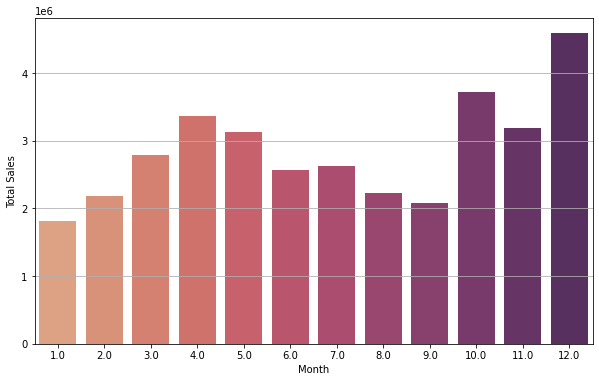

In [17]:
#Now let's try to solve the first task
#First we need the value of total sales of each month
sales_per_month = df.groupby('month').sum()

plt.figure(figsize=(10,6))
sns.barplot(x = sales_per_month.index, y=sales_per_month['Price Each'], palette='flare')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(axis='y')

In [18]:
#Data Frame to visualize the difference between values
df_sales = pd.DataFrame({'Total Sales': sales_per_month['Price Each']})

df_sales.sort_values('Total Sales', ascending=False)

,Total Sales
month,
12.0,4.588415e+06
10.0,3.715555e+06
4.0,3.367671e+06
11.0,3.180601e+06
5.0,3.135125e+06
3.0,2.791208e+06
7.0,2.632540e+06
6.0,2.562026e+06
8.0,2.230345e+06


## Task 2
What city sold the most product

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0


In [37]:
df['cities'] = df['Purchase Address'].str.split(',').str.get(1)

In [38]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,cities
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,New York City
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,New York City
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,New York City
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,San Francisco
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,Atlanta


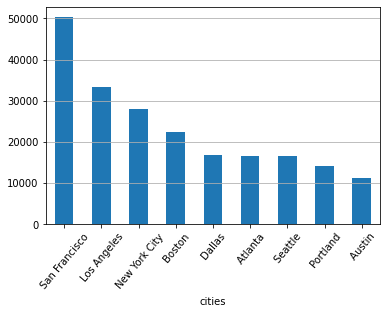

In [53]:
df_cities = df.groupby('cities').sum()['Quantity Ordered'].sort_values(ascending=False)
df_cities.plot(kind='bar')
plt.grid(axis='y')
plt.xticks(rotation = 50);

## Task 3
What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [55]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,cities
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,New York City
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,New York City
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,New York City
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,San Francisco
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,Atlanta
5,295670,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12.0,New York City
6,295671,USB-C Charging Cable,1.0,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12.0,Portland
7,295672,USB-C Charging Cable,2.0,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12.0,Dallas
8,295673,Bose SoundSport Headphones,1.0,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12.0,Dallas
9,295674,AAA Batteries (4-pack),4.0,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12.0,Dallas


In [62]:
#I will answer this task by considerating only the hour
#that the product was bought
df['hour'] = df['Order Date'].dt.hour

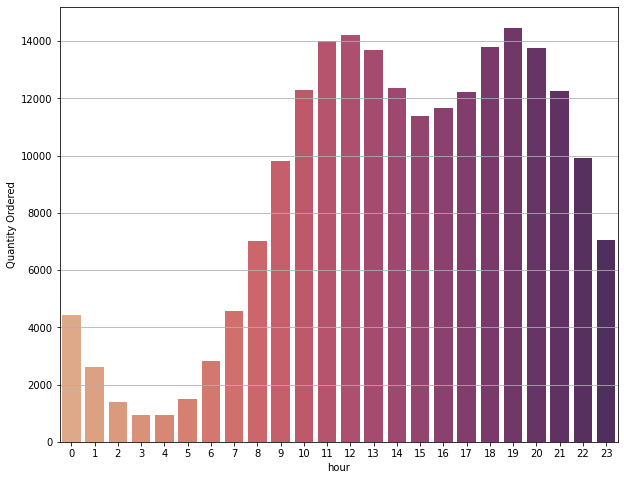

In [83]:
df_sale_time = df.groupby('hour').sum().sort_values('Quantity Ordered', ascending=False)
df_sale_time.index = df_sale_time.index.astype(int)

plt.figure(figsize=(10,8))
sns.barplot(x = df_sale_time.index, y = df_sale_time['Quantity Ordered'], palette='flare')
plt.grid(axis='y')

The best time to display advertisement, based on the time the costumers bought a product, are in the range of 10 - 12am and 6-8pm.